In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts

In [2]:
data = pd.read_csv('GP03_googleplaystore.csv' , warn_bad_lines = True, na_values = ['n/a', '\s+', "N/A"]) 
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
print("Shape of the data");
data.shape

Shape of the data


(10841, 13)

In [4]:
print("==============================================================================================")
print("Information of data");
print("==============================================================================================")
data.info()
print("==============================================================================================")
print("Description of data for numerical columns");
print("==============================================================================================")
data.describe()

Information of data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
Description of data for numerical columns


,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [5]:
print("Description of categorical data");
print(data.describe(include = [np.object]))

Description of categorical data
           App Category Reviews                Size    Installs   Type  Price  \
count    10841    10841   10841               10841       10841  10840  10841   
unique    9660       34    6002                 462          22      3     93   
top     ROBLOX   FAMILY       0  Varies with device  1,000,000+   Free      0   
freq         9     1972     596                1695        1579  10039  10040   

       Content Rating Genres    Last Updated         Current Ver Android Ver  
count           10840  10841           10841               10833       10838  
unique              6    120            1378                2832          33  
top          Everyone  Tools  August 3, 2018  Varies with device  4.1 and up  
freq             8714    842             326                1459        2451  


In [6]:
#Missing values count for each columns
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

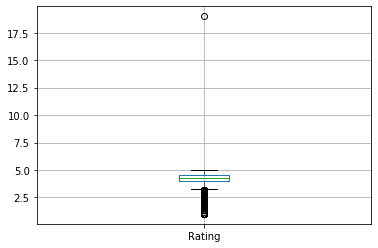

In [7]:
#checking rating column
data.boxplot()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f858d9fee50>]],
      dtype=object)

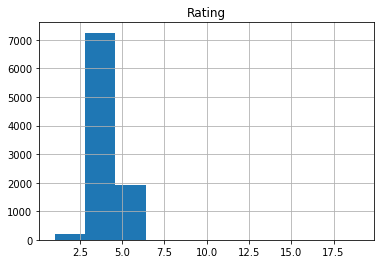

In [8]:
#There seems outlier in rating column so we tried to plot the histogram to see the values
data.hist()

In [9]:
print("Rating column:");
data['Rating'].unique()#checking unique values

Rating column:


array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [10]:
#finding rows with more than 5 ratings as the maximum rating is usually 5
data[data.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
# From the row 10472 it is observed that category column is 1.9 and category cannot be a numeric number so checking category column
print("Category column:");
data['Category'].unique()

Category column:


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [12]:
#checking wrong values in category column with values 1.9 , all other values seems fine
data[data['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
#Row 10472 seems to have wrong values as other columns also like category, type, installs doesnt makes sense
#Shifting values to right as it seems that data has been filled from backwards
shifted_value = data.loc[10472]
shifted_value[1:] = shifted_value[1:].shift(periods=1)
data.loc[10472] = shifted_value

#data.drop([10472],inplace=True)

/Users/nikita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/nikita/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_with(key, value)


In [14]:
data.loc[[10472]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


In [15]:
#now Category and genres have null values so we need to treat these values
print("Genres:");##checking genres column
data['Genres'].unique()

Genres:


array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [16]:
data.loc[10472, 'Category'] = 'LIFESTYLE'# app belongs to lifestyle category from playstore 
data.loc[10472, 'Genres'] = 'Lifestyle'

In [17]:
data.loc[[10472]]
#null values have been removed

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,LIFESTYLE,1.9,19,3.0M,"1,000+",Free,0,Everyone,Lifestyle,"February 11, 2018",1.0.19,4.0 and up


In [18]:
data.info()##check data types
data.Rating = data.Rating.astype(float)##convert to float as it was there earlier

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null object
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10841 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10839 non-null object
dtypes: object(13)
memory usage: 1.1+ MB


In [19]:
#filling missing values in rating by mean of the particular category
data['Rating'] = data.groupby('Category')['Rating'].transform(lambda x: x.fillna(x.mean()))

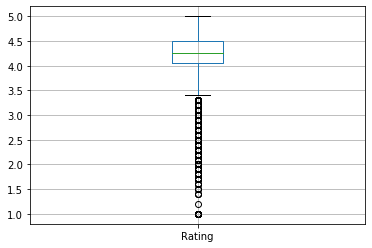

In [20]:
#checking the rating column as outlier have been removed and missing values have been handled
data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f858dd8bf10>]],
      dtype=object)

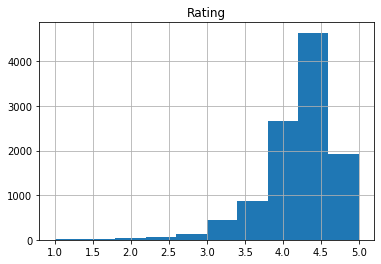

In [21]:
#plotting histogram to check values of rating after removing outlier
data.hist()

In [22]:
#Checking values in type column for treating missing values
print("Type column:");
data['Type'].unique()

Type column:


array(['Free', 'Paid', nan], dtype=object)

In [23]:
#checking missing values in type column
data[data['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.192272,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [24]:
#Since price is 0 for this row it means the app should be of free type
data["Type"].fillna("Free",inplace=True)#replacing one null value with free
data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [25]:
#Handling missing values in other columns
print("Current Ver:");
data['Current Ver'].unique()

Current Ver:


array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [26]:
print("Android Ver:");
data['Android Ver'].unique()

Android Ver:


array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [27]:
#filling the missing values in current ver and android ver with unknown values as we are not sure of the values
data['Current Ver'].fillna(value='Unknown', inplace = True) 
data['Android Ver'].fillna(value='Unknown', inplace = True)

In [28]:
#Count the missing values
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [29]:
#checking genres with Education;Education and Educational;Education values as we observed these values while treating 10472 row
data[(data['Genres'] == 'Education;Education') |( data['Genres'] == 'Educational;Education')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
699,Duolingo: Learn Languages Free,EDUCATION,4.7,6289924,Varies with device,"100,000,000+",Free,0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device
712,"Learn Japanese, Korean, Chinese Offline & Free",EDUCATION,4.9,133136,26M,"1,000,000+",Free,0,Everyone,Education;Education,"July 20, 2018",2.16.11.10,4.2 and up
715,Dinosaurs Coloring Pages,EDUCATION,4.4,390,41M,"500,000+",Free,0,Everyone,Education;Education,"February 3, 2018",1.1.6,4.0 and up
729,ABC Preschool Free,EDUCATION,3.8,27572,25M,"5,000,000+",Free,0,Everyone,Education;Education,"October 25, 2017",3.0,2.3 and up
784,Duolingo: Learn Languages Free,EDUCATION,4.7,6290507,Varies with device,"100,000,000+",Free,0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9287,EF Spelling Bee,FAMILY,3.0,2,9.4M,500+,Free,0,Everyone,Education;Education,"October 12, 2017",1.2.2,4.3 and up
9334,EG Classroom Decimals™,FAMILY,3.0,2,18M,50+,Paid,$2.99,Everyone,Education;Education,"June 12, 2017",2.2.2,2.2 and up
9831,Lire avec Sami et Julie,FAMILY,3.6,569,18M,"100,000+",Free,0,Everyone,Educational;Education,"June 13, 2014",1.2,2.2 and up
10098,Ey Sey Storytime រឿងនិទានតាឥសី,FAMILY,4.7,1327,44M,"10,000+",Free,0,Everyone,Education;Education,"May 18, 2017",1.2.2,4.0.3 and up


In [30]:
#Replacing 'Education;Education' and 'Educational;Education' with 'Education'
data['Genres'] = data['Genres'].apply(lambda x: str(x).replace('Education;Education','Education') if 'Education;Education' in str(x) else str(x))
data['Genres'] = data['Genres'].apply(lambda x: str(x).replace('Educational;Education','Education') if 'Educational;Education' in str(x) else str(x))

In [31]:
#Checking after replacing
gen_ed = data[(data['Genres'] == 'Education;Education') |( data['Genres'] == 'Educational;Education')]
print(gen_ed)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [32]:
#Checking values in other columns in order to ensure that data is in correct format
print("Content Rating:");
data['Content Rating'].unique()

Content Rating:


array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [33]:
#Checking rows with content rating as unrated
data[data['Content Rating'] == 'Unrated']
#Since there are only 2 rows which are unrated so it wont effect our analysis

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7312,Best CG Photography,FAMILY,4.192272,1,2.5M,500+,Free,0,Unrated,Entertainment,"June 24, 2015",5.2,3.0 and up
8266,DC Universe Online Map,TOOLS,4.100000,1186,6.4M,"50,000+",Free,0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


In [34]:
#Checking Reviews column
print("Reviews:");
data['Reviews'].unique()
#The values seems fine

Reviews:


array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [35]:
data.Reviews = data.Reviews.astype(int)##converting to int

In [36]:
#Checking Size column
print("Size:");
data['Size'].unique()

Size:


array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [37]:
data[data['Size']  == 'Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


In [38]:
#Making size as float by removing M,K and handling varies with device
K=data[data['Size'].apply(lambda x : list(x)[-1] == 'k')]
M=data[data['Size'].apply(lambda x : list(x)[-1] == 'M')]
VWD=data[data['Size']  == 'Varies with device']

In [39]:
M['Size']=(M['Size'].apply(lambda x: x.replace('M',''))).astype(float)
K['Size']=((K['Size'].apply(lambda x: x.replace('k',''))).astype(float))/1000
VWD['Size']=np.NaN

/Users/nikita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/nikita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/nikita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [40]:
new_df = pd.concat([VWD, K, M])
new_df = new_df.reset_index(drop=True)

In [41]:
#filling missing values in size by mean of the particular category
new_df['Size'] = new_df.groupby('Category')['Size'].transform(lambda x: x.fillna(x.mean()))

In [42]:
data=new_df
data['Size'].unique()

array([1.23709677e+01, 2.00371467e+01, 1.37957447e+01, 1.33108223e+01,
       1.44721625e+01, 1.34853529e+01, 1.17667057e+01, 1.66255566e+01,
       2.07908288e+01, 2.18533333e+01, 1.39637544e+01, 1.79285668e+01,
       2.21850000e+01, 2.27692121e+01, 1.59787647e+01, 1.10833354e+01,
       1.47205260e+01, 4.43700985e+01, 2.83192505e+01, 1.96290392e+01,
       1.76818714e+01, 1.61754279e+01, 1.73676654e+01, 2.43390129e+01,
       2.46544948e+01, 8.77125034e+00, 1.12981493e+01, 1.29814158e+01,
       2.25129630e+01, 1.31242456e+01, 1.60845802e+01, 1.30236481e+01,
       1.66147130e+01, 2.01000000e-01, 2.30000000e-02, 7.90000000e-02,
       1.18000000e-01, 6.95000000e-01, 1.80000000e-02, 5.56000000e-01,
       5.26000000e-01, 3.34000000e-01, 2.32000000e-01, 6.24000000e-01,
       8.50000000e-03, 4.10000000e-02, 2.92000000e-01, 1.10000000e-02,
       7.04000000e-01, 8.62000000e-01, 8.99000000e-01, 3.78000000e-01,
       2.66000000e-01, 3.75000000e-01, 9.75000000e-01, 9.80000000e-01,
      

In [43]:
#Checking Installs column
print("Installs:");
data['Installs'].unique()

Installs:


array(['5,000,000+', '10,000,000+', '1,000,000+', '100,000+', '500,000+',
       '100,000,000+', '1,000,000,000+', '50,000,000+', '500,000,000+',
       '10,000+', '50,000+', '500+', '1,000+', '5,000+', '10+', '1+',
       '100+', '50+', '5+', '0', '0+'], dtype=object)

In [44]:
data['Installs'] = data['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))#removing +
data['Installs'] = data['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
data['Installs'] = pd.to_numeric(data['Installs'], errors ='coerce')#changing to numeric

In [45]:
data['Installs'].unique()

array([   5000000,   10000000,    1000000,     100000,     500000,
        100000000, 1000000000,   50000000,  500000000,      10000,
            50000,        500,       1000,       5000,         10,
                1,        100,         50,          5,          0])

In [46]:
data['Price'].unique()

array(['0', '$3.99', '$4.99', '$3.49', '$2.99', '$7.49', '$6.99', '$2.49',
       '$3.95', '$4.49', '$5.99', '$8.99', '$1.99', '$0.99', '$2.50',
       '$1.49', '$11.99', '$5.49', '$3.90', '$4.59', '$12.99', '$2.95',
       '$10.99', '$6.49', '$1.29', '$5.00', '$399.99', '$4.80', '$29.99',
       '$14.99', '$1.00', '$1.04', '$7.99', '$9.99', '$9.00', '$10.00',
       '$24.99', '$79.99', '$16.99', '$1.50', '$19.99', '$15.99',
       '$33.99', '$74.99', '$39.99', '$1.70', '$2.00', '$3.88', '$25.99',
       '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61',
       '$1.59', '$13.99', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$19.90', '$8.49', '$1.75', '$14.00', '$4.85', '$46.99',
       '$109.99', '$154.99', '$3.08', '$2.59', '$1.96', '$19.40',
       '$15.46', '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20'], dtype=object)

In [47]:
data['Price'] = data['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))#removing $ sign
data['Price'] = data['Price'].apply(lambda x: float(x))##converting to float type

In [48]:
data['Price'].unique()

array([  0.  ,   3.99,   4.99,   3.49,   2.99,   7.49,   6.99,   2.49,
         3.95,   4.49,   5.99,   8.99,   1.99,   0.99,   2.5 ,   1.49,
        11.99,   5.49,   3.9 ,   4.59,  12.99,   2.95,  10.99,   6.49,
         1.29,   5.  , 399.99,   4.8 ,  29.99,  14.99,   1.  ,   1.04,
         7.99,   9.99,   9.  ,  10.  ,  24.99,  79.99,  16.99,   1.5 ,
        19.99,  15.99,  33.99,  74.99,  39.99,   1.7 ,   2.  ,   3.88,
        25.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,
         1.59,  13.99, 299.99, 379.99,  37.99,  18.99, 389.99,  19.9 ,
         8.49,   1.75,  14.  ,   4.85,  46.99, 109.99, 154.99,   3.08,
         2.59,   1.96,  19.4 ,  15.46,   3.04,   4.29,   2.6 ,   3.28,
         4.6 ,  28.99,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,
         3.61, 394.99,   1.26,   1.2 ])

In [49]:
#Checking Last Updated column
data['Last Updated'].unique()

array(['July 14, 2018', 'July 30, 2018', 'May 25, 2018', ...,
       'November 25, 2014', 'May 19, 2016', 'January 20, 2014'],
      dtype=object)

In [50]:
data["Last Updated"] = pd.to_datetime(data["Last Updated"])#convert Last Updated into datetime format
data['Last Updated'].unique()

array(['2018-07-14T00:00:00.000000000', '2018-07-30T00:00:00.000000000',
       '2018-05-25T00:00:00.000000000', ...,
       '2014-11-25T00:00:00.000000000', '2016-05-19T00:00:00.000000000',
       '2014-01-20T00:00:00.000000000'], dtype='datetime64[ns]')

In [51]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            10841 non-null float64
Reviews           10841 non-null int64
Size              10841 non-null float64
Installs          10841 non-null int64
Type              10841 non-null object
Price             10841 non-null float64
Content Rating    10841 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null datetime64[ns]
Current Ver       10841 non-null object
Android Ver       10841 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.1+ MB
None
             Rating       Reviews          Size      Installs         Price
count  10841.000000  1.084100e+04  10841.000000  1.084100e+04  10841.000000
mean       4.190199  4.441119e+05     21.208162  1.546291e+07      1.027273
std        0.480566  2.927629e+06     21.054546 

In [52]:
#Identifying Duplicated rows
data.duplicated().sum()

483

In [53]:
#Deleting Duplicated rows
data.drop_duplicates(inplace=True)

In [54]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Floor Plan Creator,ART_AND_DESIGN,4.100000,36639,12.370968,5000000,Free,0.0,Everyone,Art & Design,2018-07-14,Varies with device,2.3.3 and up
1,Textgram - write on photos,ART_AND_DESIGN,4.400000,295221,12.370968,10000000,Free,0.0,Everyone,Art & Design,2018-07-30,Varies with device,Varies with device
2,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.600000,17057,20.037147,1000000,Free,0.0,Everyone,Auto & Vehicles,2018-07-30,Varies with device,Varies with device
3,Ulysse Speedometer,AUTO_AND_VEHICLES,4.300000,40211,20.037147,5000000,Free,0.0,Everyone,Auto & Vehicles,2018-07-30,Varies with device,Varies with device
4,REPUVE,AUTO_AND_VEHICLES,3.900000,356,20.037147,100000,Free,0.0,Everyone,Auto & Vehicles,2018-05-25,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,FR Forms,BUSINESS,4.121452,0,9.600000,10,Free,0.0,Everyone,Business,2016-09-29,1.1.5,4.0 and up
10837,Sya9a Maroc - FR,FAMILY,4.500000,38,53.000000,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10838,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.600000,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10839,Parkinson Exercices FR,MEDICAL,4.189143,3,9.500000,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up


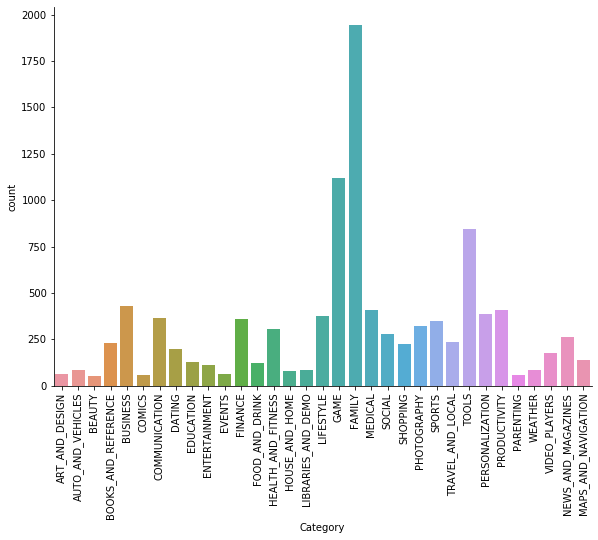

In [55]:
#Data Visualisation to identify top categories (number of apps developed based on categories)
p=sns.catplot(x="Category", data=data, kind="count",height=6, aspect=1.5)
p.set_xticklabels(rotation=90)

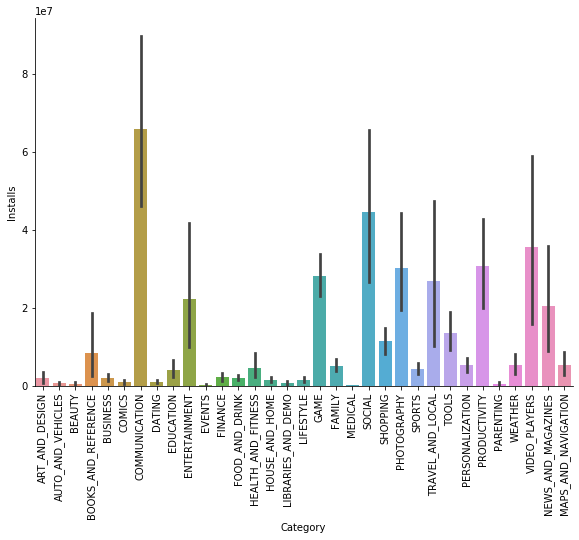

In [56]:
#plot of category vs installs(number of apps installed based on category)
p=sns.catplot(x="Category", y="Installs",data=data,kind="bar",height=6, aspect=1.5)
p.set_xticklabels(rotation=90)

In [57]:
#from the above 2 graphs we can see that top categories according to app developed differs
#from top categories according to number of installs

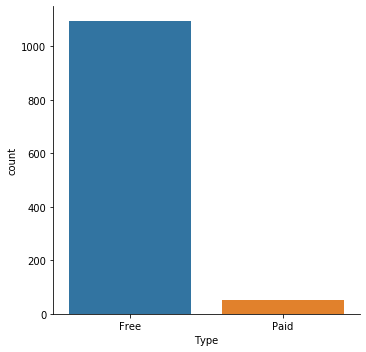

In [58]:
#comparision of installation types free vs paid

teen = data[data['Content Rating'] == 'Teen']
Free = teen[teen['Type']=='Free']
Paid = teen[teen['Type']=='Paid']
sns.catplot(x="Type", kind="count",data=teen)

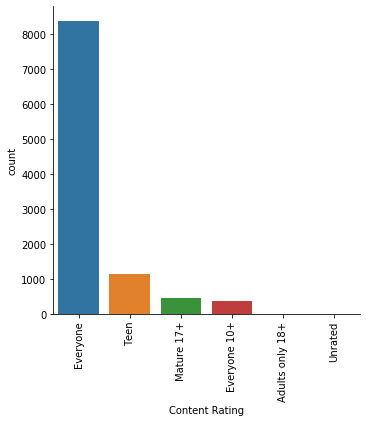

In [59]:
p = sns.catplot(x = "Content Rating",  kind = "count",data = data)
p.set_xticklabels(rotation=90)

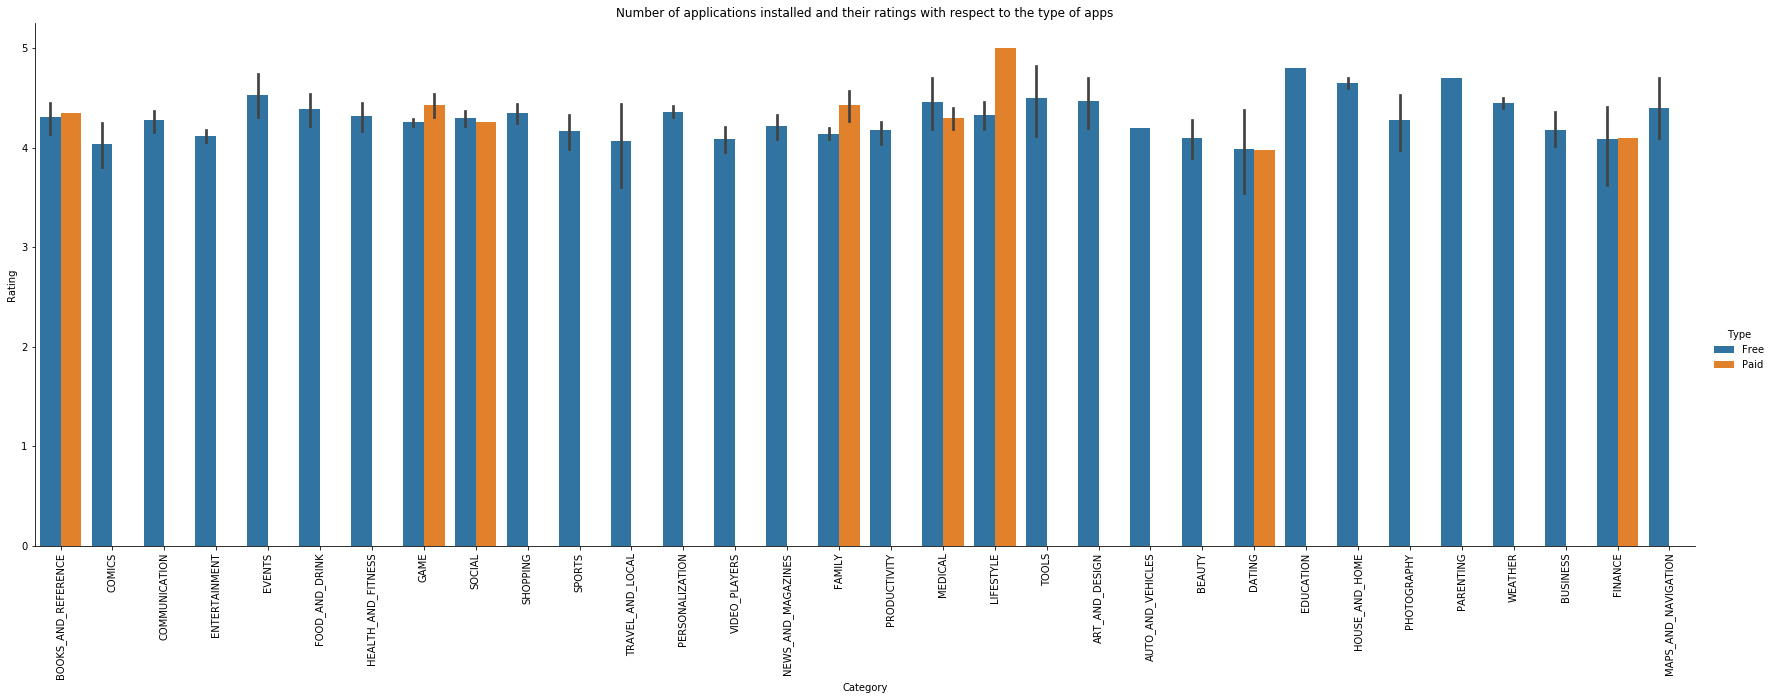

In [60]:
g = sns.catplot(x="Category", y="Rating",
               hue="Type", 
               data=teen, kind="bar",
                 height=8, aspect=3);
g.set_xticklabels(rotation=90).set(xlabel='Category', ylabel='Rating',title="Number of applications installed and their ratings with respect to the type of apps")



In [61]:
teen.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.056380,0.077631,0.007815,-0.003970
Reviews,0.056380,1.000000,-0.007768,0.684786,-0.008233
Size,0.077631,-0.007768,1.000000,-0.044564,-0.034681
Installs,0.007815,0.684786,-0.044564,1.000000,-0.010401
Price,-0.003970,-0.008233,-0.034681,-0.010401,1.000000


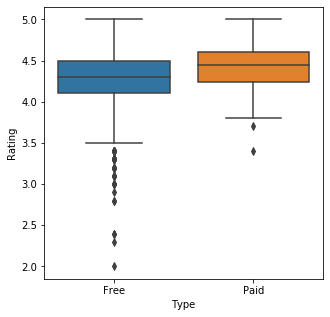

In [62]:
plt.figure(figsize=(5,5))
plt.tight_layout()
sns.boxplot(x='Type', y='Rating', data=teen)

Text(0.5, 1.0, '% Distribution of Paided Apps Categories')

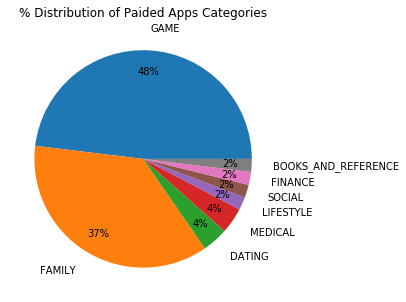

In [63]:
df3 = Paid['Category'].value_counts()
df3 = df3.reset_index()
df3 = df3[:10]
plt.figure(figsize=(10,5))
plt.pie(x = list(df3['Category']), labels=list(df3['index']), autopct='%1.0f%%', pctdistance=0.8, labeldistance=1.2)
plt.title('% Distribution of Paided Apps Categories')

In [64]:
from scipy.stats import ttest_ind
ttest_ind(Free['Rating'], Paid['Rating'])#it compares the mean of the free and paid type for teen group

Ttest_indResult(statistic=-3.3278032120988605, pvalue=0.0009031881782899749)

In [65]:
#There is a statistically significant difference in the average rating between paid and free apps t= -3.3278, p<0.05
print("Mean Rating of Free apps for teens", Free['Rating'].mean())
print("Mean Rating of Paid apps for teens", Paid['Rating'].mean())

#Since mean of paid apps is greater so it can be said overall that charged app would get higher rating compared to free apps for teen group
#So we can reject null hypothesis whcih states that mean of 2 groups are same


Mean Rating of Free apps for teens 4.229140397654164
Mean Rating of Paid apps for teens 4.403942305368506


In [66]:
# Performing analysis between Type and Rating columns:
# Encoding values in Type column (Free as 0 and Paid as 1)
teen["Type"].replace({"Free": 0, "Paid": 1}, inplace = True)
print(teen["Type"].unique())

[0 1]


/Users/nikita/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [67]:
teen.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                     float64
Installs                   int64
Type                       int64
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

In [68]:
# Checking correlation between Rating and Type for Teen Group

rating = teen['Rating']
apptype = teen['Type']

stat, p_value = sts.spearmanr(rating, apptype)
print ('The spearman r and p-values are: ') 
print(stat)
print(p_value)

The spearman r and p-values are: 
0.10646959916397715
0.0003054791485868817


Since the p-value is less than 0.05, the two columns rating and type are positively correlated i.e. when type is high, rating would be higher. Which implies that when the app is paid the rating is higher.

In [69]:
# Analysing correlation between Rating and Type across various categories
teen["Category"].unique()

array(['BOOKS_AND_REFERENCE', 'COMICS', 'COMMUNICATION', 'ENTERTAINMENT',
       'EVENTS', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'GAME', 'SOCIAL',
       'SHOPPING', 'SPORTS', 'TRAVEL_AND_LOCAL', 'PERSONALIZATION',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'FAMILY', 'PRODUCTIVITY',
       'MEDICAL', 'LIFESTYLE', 'TOOLS', 'ART_AND_DESIGN',
       'AUTO_AND_VEHICLES', 'BEAUTY', 'DATING', 'EDUCATION',
       'HOUSE_AND_HOME', 'PHOTOGRAPHY', 'PARENTING', 'WEATHER',
       'BUSINESS', 'FINANCE', 'MAPS_AND_NAVIGATION'], dtype=object)

In [70]:
# Checking correlation for few categories:
# For DATING:
dating = teen[teen['Category'] == 'DATING']

rating = dating['Rating']
apptype = dating['Type']

print(ttest_ind(rating, apptype))
stat_date, p_value_date = sts.spearmanr(rating, apptype)
print ('The spearman r and p-values are: ') 
print(stat_date)
print(p_value_date)

Ttest_indResult(statistic=17.80422639874343, pvalue=7.099098506892933e-13)
The spearman r and p-values are: 
-0.19687480773953947
0.5856441346512037


In [71]:
# For GAME:
game = teen[teen['Category'] == 'GAME']

rating = game['Rating']
apptype = game['Type']

print(ttest_ind(rating, apptype))
stat_game, p_value_game = sts.spearmanr(rating, apptype)
print ('The spearman r and p-values are: ') 
print(stat_game)
print(p_value_game)

Ttest_indResult(statistic=177.72257596889824, pvalue=0.0)
The spearman r and p-values are: 
0.14268795473629223
0.00989106478754431


In [72]:
# For MEDICAL:
med = teen[teen['Category'] == 'MEDICAL']

rating = med['Rating']
apptype = med['Type']

print(ttest_ind(rating, apptype))
stat_med, p_value_med = sts.spearmanr(rating, apptype)
print ('The spearman r and p-values are: ') 
print(stat_med)
print(p_value_med)

Ttest_indResult(statistic=15.162789701876235, pvalue=3.543989797604228e-07)
The spearman r and p-values are: 
-0.4442616583193193
0.4535493471690853


In [73]:
# For FAMILY:
fam = teen[teen['Category'] == 'FAMILY']

rating = fam['Rating']
apptype = fam['Type']

print(ttest_ind(rating, apptype))
stat_fam, p_value_fam = sts.spearmanr(rating, apptype)
print ('The spearman r and p-values are: ') 
print(stat_fam)
print(p_value_fam)

Ttest_indResult(statistic=131.88852619755608, pvalue=0.0)
The spearman r and p-values are: 
0.22183482240985772
0.0003041340583713927


In [74]:
# For FINANCE:
fin = teen[teen['Category'] == 'FINANCE']

rating = fin['Rating']
apptype = fin['Type']

print(ttest_ind(rating, apptype))
stat_fin, p_value_fin = sts.spearmanr(rating, apptype)
print ('The spearman r and p-values are: ') 
print(stat_fin)
print(p_value_fin)

Ttest_indResult(statistic=14.238160800048572, pvalue=5.768406079143993e-07)
The spearman r and p-values are: 
-0.35355339059327373
0.5594043441634877


In [75]:
# For SOCIAL:
social = teen[teen['Category'] == 'SOCIAL']

rating = social['Rating']
apptype = social['Type']

print(social['Type'].unique())
print(ttest_ind(rating, apptype))
stat_social, p_value_social = sts.spearmanr(rating, apptype)
print ('The spearman r and p-values are: ') 
print(stat_social)
print(p_value_social)

[0 1]
Ttest_indResult(statistic=113.86783830375363, pvalue=7.056360743538049e-211)
The spearman r and p-values are: 
-0.020999862893904712
0.8191596669941184


In [76]:
pvalues = {'P-Values':[p_value, p_value_date, p_value_game, p_value_med, p_value_fam, p_value_fin, p_value_social]}
pvalues = pd.DataFrame(pvalues, index = ['All Categories', 'DATING', 'GAME', 'MEDICAL', 'FAMILY', 'FINANCIAL', 'SOCIAL'])
pvalues

,P-Values
All Categories,0.000305
DATING,0.585644
GAME,0.009891
MEDICAL,0.453549
FAMILY,0.000304
FINANCIAL,0.559404
SOCIAL,0.819160


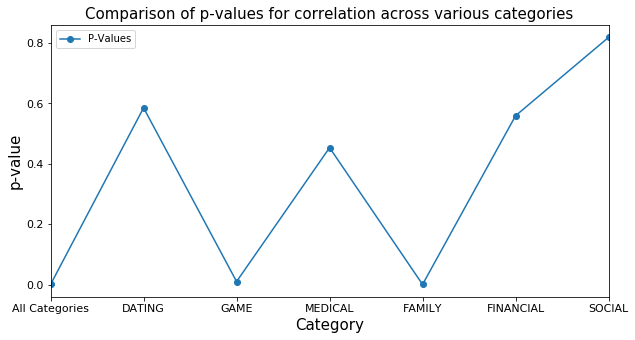

In [77]:
pvalues.plot.line(fontsize=11, marker = 'o', figsize = (10,5))
plt.title("Comparison of p-values for correlation across various categories", fontsize=15)
plt.xlabel("Category", fontsize=15)
plt.ylabel("p-value", fontsize=15)
plt.show()